<a href="https://colab.research.google.com/github/Agil0509/Machine-Learning/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Voting Classifiers

In [1]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples = 500, noise = 0.3, random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)

voting_clf = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state = 42)),
        ('svc', SVC(random_state = 42))
    ]
)

voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [2]:
voting_clf.named_estimators_

{'lr': LogisticRegression(random_state=42),
 'rf': RandomForestClassifier(random_state=42),
 'svc': SVC(random_state=42)}

In [3]:
voting_clf.score(X_test,y_test)

0.912

In [4]:
for name, clf in voting_clf.named_estimators_.items():
  print(name, '=', clf.score(X_test,y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [5]:
voting_clf.predict(X_test[:1])

array([1])

In [6]:
voting_clf.estimators_

[LogisticRegression(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(random_state=42)]

In [7]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [8]:
voting_clf.voting = 'soft'
voting_clf.named_estimators['svc'].probability = True
voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

0.92

#Bagging and Pasting

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples = 100,bootstrap = True, n_jobs = -1, random_state = 42)
bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

0.904

In [10]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
tree_clf.score(X_test,y_test)

0.856

#Out of Bag Evaluation

In [11]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500,
                            max_samples = 100, bootstrap = True, oob_score = True, n_jobs = -1, random_state = 42)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.9253333333333333

In [12]:
(1-1/1000)**1000 # 36.8 % data is out of bag

0.36769542477096373

#Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rnf_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, random_state = 42)
rnf_clf.fit(X_train,y_train)
rnf_clf.score(X_test,y_test)

0.912

In [14]:

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes = 16, max_features='sqrt'),
                            max_samples = 1.0,n_estimators = 500, n_jobs = -1, random_state = 42)
bag_clf.fit(X_train,y_train)
bag_clf.score(X_test,y_test)

0.912

In [15]:
import numpy as np

rnf_pred = rnf_clf.predict(X_test)
bag_pred = bag_clf.predict(X_test)
np.all(rnf_pred==bag_pred)

True

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
extra_clf.fit(X_train,y_train)
extra_clf.score(X_test,y_test)

0.912

#Feature Importance

In [17]:
rnf_clf.feature_importances_

array([0.42253629, 0.57746371])

In [18]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)
rnf_clf = RandomForestClassifier(n_estimators = 500, random_state = 42)
rnf_clf.fit(iris.data,iris.target)


for name, score in zip(iris.data.columns,rnf_clf.feature_importances_):
  print(name,': ', round(score,2))

sepal length (cm) :  0.11
sepal width (cm) :  0.02
petal length (cm) :  0.44
petal width (cm) :  0.42


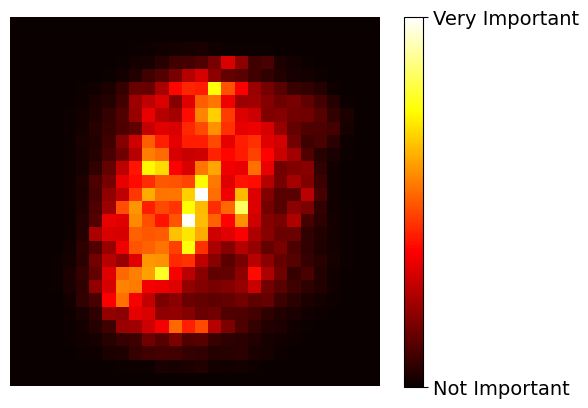

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

X_mnist,y_mnist = fetch_openml('mnist_784', return_X_y = True, as_frame = False,
                               parser = 'auto')

rnd_clf = RandomForestClassifier(n_estimators=100, random_state = 42)
rnd_clf.fit(X_mnist,y_mnist)

heatmap_image = rnd_clf.feature_importances_.reshape(28,28)
plt.imshow(heatmap_image, cmap = 'hot')
cbar = plt.colorbar(ticks = [rnd_clf.feature_importances_.min(),
                             rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Very Important'], fontsize = 14)
plt.axis('off')
plt.show()


#Boosting

#AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1),n_estimators=30, learning_rate=0.5,
    random_state = 42)

ada_clf.fit(X_train,y_train)
ada_clf.score(X_test,y_test)

0.88

#GradientBoost

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05*np.random.rand(100)

tree_reg1 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [22]:
y2 = y - tree_reg1.predict(X)

tree_reg2 = DecisionTreeRegressor(max_depth = 2, random_state=42)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [23]:
y3 = y - tree_reg2.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

grd_boost = GradientBoostingRegressor(max_depth=2, n_estimators=10,learning_rate=1.0,
                                      random_state = 42)
grd_boost.fit(X,y)
grd_boost.score(X,y)

0.9874077446198987

In [25]:
grd_best = GradientBoostingRegressor(max_depth = 2, n_estimators = 500,
                                     learning_rate = 0.05, random_state =42,
                                     n_iter_no_change = 10)
grd_best.fit(X,y)
grd_best.score(X,y)

0.9926181961464738

In [26]:
grd_best.n_estimators_

86

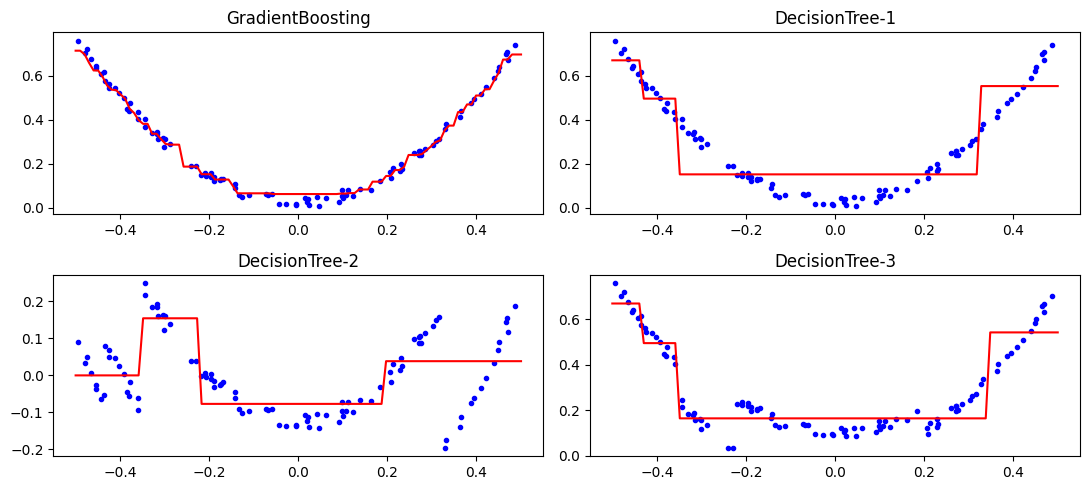

In [41]:
X_new = np.linspace(-0.5,0.5,100).reshape(-1,1)
plt.figure(figsize = (11,5))

plt.subplot(2,2,1)
plt.plot(X,y,'b.')
plt.plot(X_new, grd_best.predict(X_new),'r-')
plt.title('GradientBoosting')

plt.subplot(2,2,2)
plt.plot(X,y,'b.')
plt.plot(X_new, tree_reg1.predict(X_new),'r-')
plt.title('DecisionTree-1')


plt.subplot(2,2,3)
plt.plot(X,y2,'b.')
plt.plot(X_new, tree_reg2.predict(X_new),'r-')
plt.title('DecisionTree-2')

plt.subplot(2,2,4)
plt.plot(X,y3,'b.')
plt.plot(X_new, tree_reg3.predict(X_new),'r-')
plt.title('DecisionTree-3')

plt.tight_layout()
plt.show()

#XGBoost

In [43]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 42)
xgb.fit(X,y)
xgb.score(X,y)

0.9998882592833774

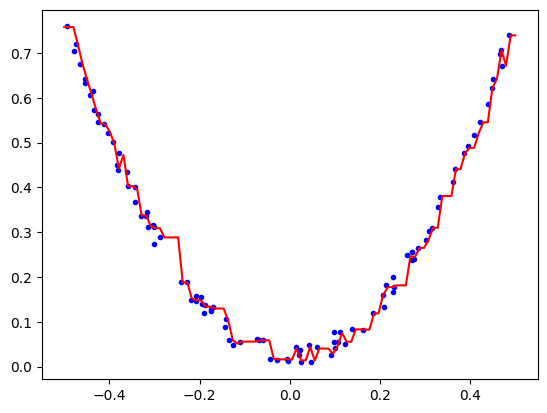

In [48]:
plt.plot(X,y,'b.')
plt.plot(X_new, xgb.predict(X_new),'r-')

#CatBoost - Categorical Boosting

In [51]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [52]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(iterations=20, learning_rate=1.0, depth = 2)
catboost.fit(X,y)
catboost.score(X,y)

0:	learn: 0.1400155	total: 49.2ms	remaining: 935ms
1:	learn: 0.1025487	total: 49.4ms	remaining: 444ms
2:	learn: 0.0905729	total: 49.4ms	remaining: 280ms
3:	learn: 0.0754797	total: 49.5ms	remaining: 198ms
4:	learn: 0.0722879	total: 49.8ms	remaining: 149ms
5:	learn: 0.0649306	total: 49.9ms	remaining: 116ms
6:	learn: 0.0613184	total: 50ms	remaining: 92.8ms
7:	learn: 0.0516266	total: 50.2ms	remaining: 75.2ms
8:	learn: 0.0485880	total: 53.1ms	remaining: 64.9ms
9:	learn: 0.0466235	total: 53.2ms	remaining: 53.2ms
10:	learn: 0.0439554	total: 53.3ms	remaining: 43.6ms
11:	learn: 0.0424314	total: 53.4ms	remaining: 35.6ms
12:	learn: 0.0407061	total: 53.5ms	remaining: 28.8ms
13:	learn: 0.0388979	total: 53.6ms	remaining: 23ms
14:	learn: 0.0385067	total: 53.7ms	remaining: 17.9ms
15:	learn: 0.0357694	total: 53.7ms	remaining: 13.4ms
16:	learn: 0.0345433	total: 53.8ms	remaining: 9.5ms
17:	learn: 0.0332475	total: 53.9ms	remaining: 5.99ms
18:	learn: 0.0306613	total: 54ms	remaining: 2.84ms
19:	learn: 0.030

0.9818826339866241

In [53]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(max_depth = 5, random_state=42)
lgbm.fit(X,y)
lgbm.score(X,y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1
[LightGBM] [Info] Start training from score 0.290404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.8418433411587392

#Stacking

In [59]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

stack_clf = StackingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 42)),
        ('rnd', RandomForestClassifier(random_state = 42)),
        ('svc', SVC(random_state = 42, probability=True))
    ], final_estimator = RandomForestClassifier(random_state = 43)
)
stack_clf.fit(X_train,y_train)
stack_clf.score(X_test,y_test)

0.928